In [1]:
import pandas as pd
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
melbourne_data = pd.read_csv('D:\\hoc python\\house.csv') 
melbourne_data

,Unnamed: 0,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,1,Abbotsford,85 Turner St,2,h,1480000,S,Biggin,03/12/16,2.5,...,1,1.0,202,NaN,NaN,Yarra,-37.79960,144.99840,Northern Metropolitan,4019
1,2,Abbotsford,25 Bloomburg St,2,h,1035000,S,Biggin,04/02/16,2.5,...,1,0.0,156,79.0,1900.0,Yarra,-37.80790,144.99340,Northern Metropolitan,4019
2,4,Abbotsford,5 Charles St,3,h,1465000,SP,Biggin,04/03/17,2.5,...,2,0.0,134,150.0,1900.0,Yarra,-37.80930,144.99440,Northern Metropolitan,4019
3,5,Abbotsford,40 Federation La,3,h,850000,PI,Biggin,04/03/17,2.5,...,2,1.0,94,NaN,NaN,Yarra,-37.79690,144.99690,Northern Metropolitan,4019
4,6,Abbotsford,55a Park St,4,h,1600000,VB,Nelson,04/06/16,2.5,...,1,2.0,120,142.0,2014.0,Yarra,-37.80720,144.99410,Northern Metropolitan,4019
5,10,Abbotsford,129 Charles St,2,h,941000,S,Jellis,07/05/16,2.5,...,1,0.0,181,NaN,NaN,Yarra,-37.80410,144.99530,Northern Metropolitan,4019
6,11,Abbotsford,124 Yarra St,3,h,1876000,S,Nelson,07/05/16,2.5,...,2,0.0,245,210.0,1910.0,Yarra,-37.80240,144.99930,Northern Metropolitan,4019
7,14,Abbotsford,98 Charles St,2,h,1636000,S,Nelson,08/10/16,2.5,...,1,2.0,256,107.0,1890.0,Yarra,-37.80600,144.99540,Northern Metropolitan,4019
8,18,Abbotsford,10 Valiant St,2,h,1097000,S,Biggin,08/10/16,2.5,...,1,2.0,220,75.0,1900.0,Yarra,-37.80100,144.99890,Northern Metropolitan,4019
9,24,Abbotsford,40 Nicholson St,3,h,1350000,VB,Nelson,12/11/16,2.5,...,2,2.0,214,190.0,2005.0,Yarra,-37.80850,144.99640,Northern Metropolitan,4019


In [2]:
cut_labels = ['Low','Medium','High'] 
cut_bins = [0, 900000, 1200000, 10000000] #0: min, 100: max
melbourne_data['Price_lable'] = pd.cut(melbourne_data['Price'], bins=cut_bins, labels=cut_labels)

In [63]:
melbourne_data.columns
melbourne_data.head()
y = melbourne_data.Price_lable #NHÃN PHÂN LỚP
#CHỌN CÁC THUỘC TÍNH PHÂN LỚP
melbourne_features = ['Rooms', 'Bathroom', 'Landsize', 'Lattitude', 'Longtitude']
X = melbourne_data[melbourne_features]
X.describe()
X.head()
y
#melbourne_data.Price_lable

0          High
1        Medium
2          High
3           Low
4          High
5        Medium
6          High
7          High
8        Medium
9          High
10       Medium
11         High
12       Medium
13       Medium
14       Medium
15          Low
16         High
17       Medium
18       Medium
19         High
20         High
21       Medium
22         High
23         High
24       Medium
25       Medium
26       Medium
27       Medium
28          Low
29          Low
          ...  
11631       Low
11632       Low
11633       Low
11634      High
11635      High
11636      High
11637       Low
11638      High
11639      High
11640    Medium
11641      High
11642      High
11643      High
11644      High
11645       Low
11646      High
11647      High
11648      High
11649    Medium
11650      High
11651    Medium
11652      High
11653       Low
11654       Low
11655       Low
11656      High
11657    Medium
11658    Medium
11659      High
11660      High
Name: Price_lable, Lengt

In [3]:
melbourne_data.columns
melbourne_data.head()
y = melbourne_data.Price_lable #NHÃN PHÂN LỚP
#CHỌN CÁC THUỘC TÍNH PHÂN LỚP
melbourne_features = ['Rooms', 'Bathroom', 'Landsize', 'Lattitude', 'Longtitude']
X = melbourne_data[melbourne_features]
X.describe()
X.head()

,Rooms,Bathroom,Landsize,Lattitude,Longtitude
0,2,1,202,-37.7996,144.9984
1,2,1,156,-37.8079,144.9934
2,3,2,134,-37.8093,144.9944
3,3,2,94,-37.7969,144.9969
4,4,1,120,-37.8072,144.9941


In [5]:
from sklearn.model_selection import train_test_split
#CHIA DỮ LIỆU 80% TRAIN, 20% TEST
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=0.2, random_state=3)

In [65]:
from sklearn import tree
#Create tree object
decision_tree = tree.DecisionTreeClassifier(criterion='gini')
#Train Decision Tree based on training set
decision_tree.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [66]:
predictions = decision_tree.predict(X_test)
print(accuracy_score(y_test, predictions))
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))

0.7226746678096871
[[664  61 120]
 [ 39 824 142]
 [141 144 198]]
              precision    recall  f1-score   support

        High       0.79      0.79      0.79       845
         Low       0.80      0.82      0.81      1005
      Medium       0.43      0.41      0.42       483

    accuracy                           0.72      2333
   macro avg       0.67      0.67      0.67      2333
weighted avg       0.72      0.72      0.72      2333



In [67]:
target=melbourne_data['Price_lable'].unique()

In [56]:
# Load libraries
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn import datasets
from IPython.display import Image  
import pydotplus
# Create DOT data
dot_data = tree.export_graphviz(decision_tree, out_file=None, 
                                feature_names=melbourne_features,  
                                class_names=target) 

dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.295174 to fit



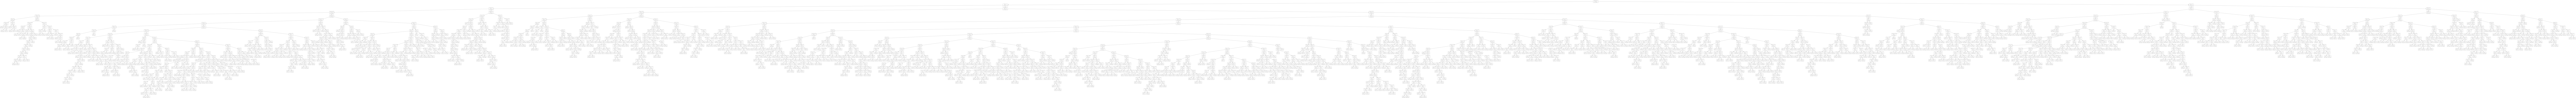

In [57]:
# Draw graph
graph = pydotplus.graph_from_dot_data(dot_data)  
# Show graph
Image(graph.create_png())

In [59]:
graph.write_pdf("D:/cayquyetdinh.pdf")
# Create PNG
graph.write_png("D:/marketing.png")

dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.295174 to fit



True